In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

## Extract Background
### Running Average

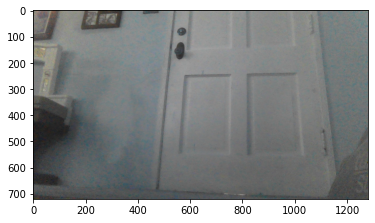

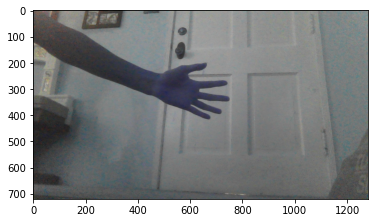

In [87]:
background = cv2.imread("images/no_hand.jpg")
foreground = cv2.imread("images/yes_hand.jpg") 

plt.imshow(background)
plt.show()

plt.imshow(foreground)
plt.show()

In [5]:
background.shape # its an array of 720 rows, 1280 columns, and 3 layers/channels

(720, 1280, 3)

In [7]:
# change to float, doesn't work with int
average = cv2.accumulateWeighted(background.astype("float"), background.astype("float"), 0.5)
display(average.shape) # still the same dimensions

(720, 1280, 3)

In [8]:
# manual calculation of accumulateWeighted
manual_average = ((1-0.5)*background) + (0.5 * background)
print((manual_average == average).all()) # exactly the same
print((average == background).all()) # since we used the same image, the average should just be background

True
True


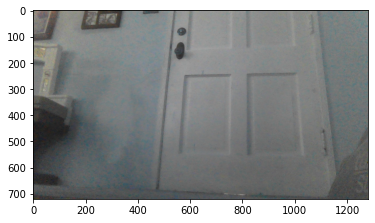

In [9]:
plt.imshow(average.astype("int")) # change back to int because it used to be float and imshow requires range 0-255 ints
plt.show()

### Background Subtraction

[[[20 64 24]
  [22 63 24]
  [26 65 23]
  [27 62 20]
  [26 53 16]]

 [[22 59 23]
  [24 61 25]
  [28 62 22]
  [31 60 23]
  [34 58 24]]

 [[32 56 28]
  [34 57 29]
  [37 58 29]
  [40 57 29]
  [45 58 31]]

 [[33 46 24]
  [41 52 30]
  [43 52 31]
  [40 50 28]
  [42 48 31]]

 [[28 30 15]
  [38 42 27]
  [45 46 32]
  [42 41 28]
  [38 34 26]]]


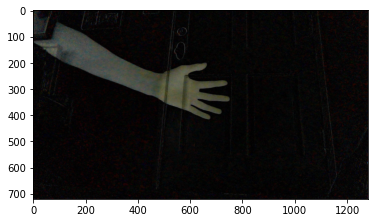

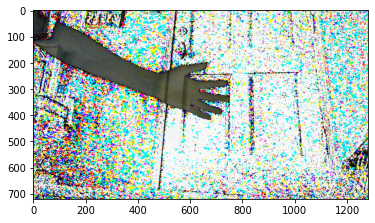

In [101]:
# calculate the difference between background and foreground
diff = cv2.absdiff(background, foreground)
print(diff[:5,:5,])
plt.imshow(diff)
plt.show()

manual_diff = abs(background - foreground) # different because cv2.absdiff performs saturation
plt.imshow(manual_diff)
plt.show()

### Threshold

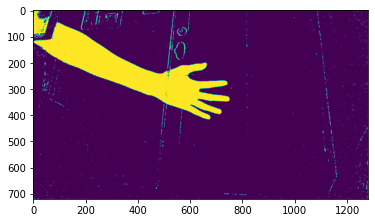

In [100]:
threshold = cv2.threshold(diff, 25, maxval=255, type=cv2.THRESH_BINARY)[1] # this returns a tuple (threshold, thresholded image)

# changes image to black and white
threshold = cv2.cvtColor(threshold, cv2.COLOR_BGR2GRAY)
plt.imshow(threshold)
plt.show()

### Contour

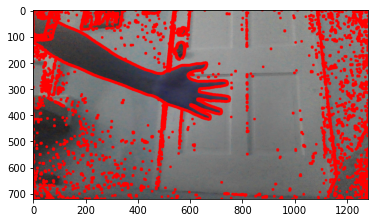

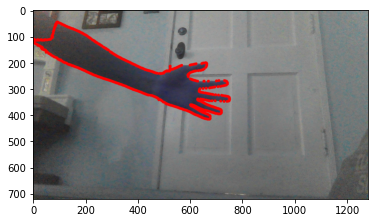

In [99]:
# find contours from our threshold image
# contours is a list of contours, but we don't want all the contours, we just want the biggest because we assume that's the hand.
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] # returns the tuple (contours, hierarchy)

# retrieves largest contour from contours
biggest_contour = max(contours, key=cv2.contourArea)

# draw all contours
f_cpy = foreground.copy()
cv2.drawContours(f_cpy, contours, -1, (255,0,0), 10) # we draw the contours on a copy of the foreground image
plt.imshow(f_cpy)
plt.show()

# draw the biggest contour
f_cpy = foreground.copy()
cv2.drawContours(f_cpy, biggest_contour, -1, (255,0,0), 10)  # we draw the contours on a copy of the foreground image
plt.imshow(f_cpy)
plt.show()